<a href="https://colab.research.google.com/github/MUTTA-ISIGI/basic-ml-course/blob/master/02_Linear_Regression/Solution%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ignore the error with yellowbrick library since we're not using it.
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 2.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [2]:
!pip install scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import sklearn
# we used the library sklearn here only to load the data

# You dont have to care about matplotlib for now
import matplotlib.pyplot as plt

# load data from sklearn
from sklearn.datasets import load_boston
data = load_boston()

In [4]:
print(data.keys())
X= data.data
y = data.target
feature_names = data.feature_names
print('data.data :{0}, data.target: {1}, num_features: {2}'.format(X.shape, y.shape, len(feature_names)))
print('num_datapoints : {}'.format(X.shape[0]))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
data.data :(506, 13), data.target: (506,), num_features: 13
num_datapoints : 506


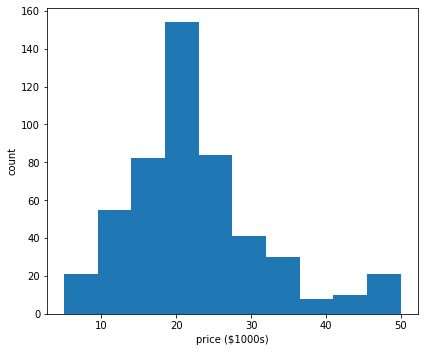

In [5]:
def label_histogram():
    plt.figure(figsize=(6, 5))
    plt.hist(y)
    plt.xlabel('price ($1000s)')
    plt.ylabel('count')
    plt.tight_layout()
label_histogram()

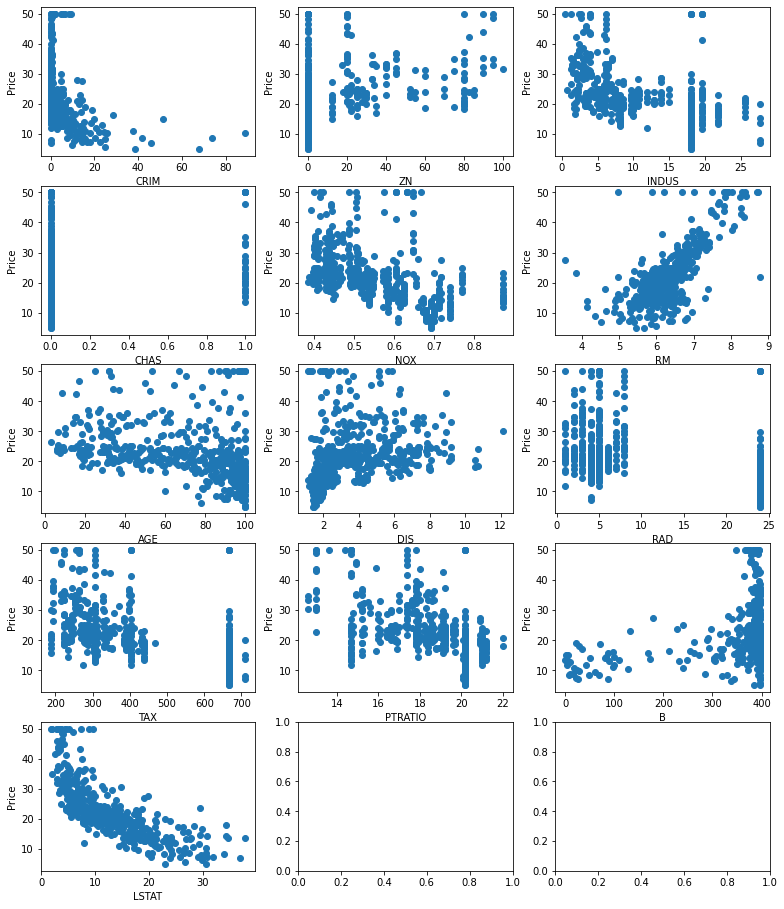

In [6]:
## PLOTING PRCIES AGAINST EACH FEATURE
def price_single_feature_ploting(input_data, feature_names):
    fig, axes = plt.subplots(5, 3, figsize = (15, 15))
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    for index, (ax, feature_name) in enumerate(zip(axes.flat[:-2],feature_names)): 
        ax.scatter(input_data[:, index], y)
        ax.set(xlabel=feature_name, ylabel='Price')
price_single_feature_ploting(X, feature_names)

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
def training(X, y):
    """ find the coefficients and the intercept of the linear model which fit best to the dataset 
    X: is a the input matrix, which rows are examples and columns are features
    y: the target vector, which has length equals to the number of total examples in the dataset
    
    return:
    
    coefficients : which is a vector, lenght equals to number of features  
    intercept: a scalar (the bias)"""
    model = LinearRegression()
    model.fit(X,y)
    coefficients = model.coef_
    intercept = model.intercept_
    

    return coefficients,intercept
  

training(X, y)


(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]), 36.459488385090125)

In [8]:
## your result should look like this (with a small error due to machine precision)
coefficients, intercept = training(X, y)
assert np.allclose(coefficients,
                   np.array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
                             -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
                             3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
                             -5.24758378e-01]))
assert np.allclose(intercept, 36.459488385090125)

In [9]:
from sklearn.linear_model import LinearRegression
def prediction(X, coefficients, intercept):
    """compute y_predict: the price prediction of our model for your input houses 
    X: is a the input matrix(N houses) or a vector (1 houses) , with columns are features
    coefficients and scalar: calculated above
    
    return:
    y_predict: a vector or scalar (equal to number of houses)
    """
    model=LinearRegression()
    model.fit(X,y)
    y_predict= model.predict(X)
    return y_predict
prediction(X, coefficients, intercept)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [10]:
# MSE evaluation

from sklearn.metrics import mean_squared_error
def MSE(X, y_target, coefficients, intercept):
    """Calculate the mean square error of your model
    X: is a the input matrix , which rows are examples and columns are features
    y_target : a vector,contains the true housing prices for all houses in the dataset
    coefficients and scalar: calculated above, used to compute y_predict
    
    return:
    MSE: a scalar"""
    
    # compute y_predict: the price prediction of our model for all houses
    #1 line of code
    y_predict = prediction(X, coefficients, intercept)
    
    # calculate MSE based on y_predict and y_target
    assert len(y_predict) == len(y_target)
    # 1 line of code
    MSE = mean_squared_error(y_target,y_predict)

    return MSE
MSE(X, y, coefficients, intercept)

21.894831181729202

In [11]:
## we expect your MSE on the housing dataset to look like this
mse = MSE(X, y, coefficients, intercept)
assert np.allclose(mse, 21.894831181729202)

In [12]:
## ploting to see our model
def visualize_results(y_predict, y_target):
    """ this function plot your y_predict and y_predict to see how closed they are"""
    
    plt.figure(figsize=(5, 4))
    plt.scatter(y_target, y_predict)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()

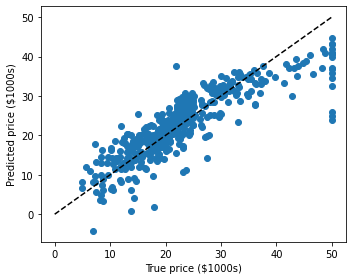

In [13]:
# run this function to see your result
visualize_results(prediction(X, coefficients, intercept), y)